# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 8
<p>Redes Neuronales Artificiales.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import read_csv, DataFrame, concat
import numpy as np
import matplotlib.pyplot as plt
import random

# Seleccion de caracteristicas
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix

# Metricas
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Cargar el Dataset "*Optical Recognition of Handwritten Digits*" del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Realiza el preprocesamiento más adecuado para los datos.
- Entrena un modelo de redes neuronales para clasificación y evalúa su rendimiento.
- Trata de buscar la mejor combinación para los distintos parámetros del modelo.


***Fuente:*** *https://archive-beta.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits*

In [3]:
# Carga del dataset
column_names=[f'''Atribute_{i}''' for i in range(1,65,1)]
column_names.append('class')

df_train=read_csv('optdigits.tra', sep=',', names=column_names)
df_test=read_csv('optdigits.tes', sep=',', names=column_names)
df=concat([df_train, df_test])

# Representación de los datos
df

,Atribute_1,Atribute_2,Atribute_3,Atribute_4,Atribute_5,Atribute_6,Atribute_7,Atribute_8,Atribute_9,Atribute_10,...,Atribute_56,Atribute_57,Atribute_58,Atribute_59,Atribute_60,Atribute_61,Atribute_62,Atribute_63,Atribute_64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


<div style="font-size:14px; text-align:justify"><b>1: </b>Realiza el preprocesamiento más adecuado para los datos.</div>

Previo a ello, separamos los datos en train y test.

In [4]:
# Separación en datos de entrada y salida del dataframe
X=df[df.columns[:-1]]
y=df[df.columns[-1:]]

# Separacion train y test
seed = random.randint(0,42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

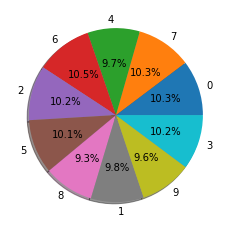

In [5]:
# Agrupación de la columna deseada
class_distribution=y_train.groupby('class').size()

plt.pie(class_distribution, labels=df['class'].unique(), autopct='%1.1f%%', shadow=True)

plt.show()

Para cada una de las clases hay un 10% de los datos, por tanto, los datos estan balanceados.

In [6]:
# Normalizado de los datos mediante RobustScaler
stdScaler = RobustScaler().fit(X_train)
data_std=stdScaler.transform(X_train)

X_train_std=DataFrame(data=data_std, columns=stdScaler.get_feature_names_out())

In [7]:
X_train_std.describe()

,Atribute_1,Atribute_2,Atribute_3,Atribute_4,Atribute_5,Atribute_6,Atribute_7,Atribute_8,Atribute_9,Atribute_10,...,Atribute_55,Atribute_56,Atribute_57,Atribute_58,Atribute_59,Atribute_60,Atribute_61,Atribute_62,Atribute_63,Atribute_64
count,3765.0,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,...,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000
mean,0.0,0.300133,0.051295,-0.231766,-0.239708,0.158805,1.409827,0.136521,0.003718,0.660646,...,0.380194,0.152988,0.000266,0.275166,0.089066,-0.165471,-0.204857,0.055246,1.022045,0.242762
std,0.0,0.868147,0.582398,0.852445,0.743904,0.563856,3.397139,1.051267,0.103020,1.039354,...,0.693290,0.783714,0.016297,0.891411,0.560372,0.726335,0.709773,0.482986,2.005881,1.375367
min,0.0,0.000000,-0.625000,-2.600000,-2.166667,-0.400000,0.000000,0.000000,0.000000,0.000000,...,-0.142857,0.000000,0.000000,0.000000,-0.555556,-2.166667,-1.857143,-0.500000,0.000000,0.000000
25%,0.0,0.000000,-0.500000,-0.600000,-0.666667,-0.400000,0.000000,0.000000,0.000000,0.000000,...,-0.142857,0.000000,0.000000,0.000000,-0.444444,-0.500000,-0.571429,-0.500000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.500000,0.400000,0.333333,0.600000,0.000000,0.000000,0.000000,1.000000,...,0.857143,0.000000,0.000000,0.000000,0.555556,0.500000,0.428571,0.500000,1.000000,0.000000
max,0.0,8.000000,1.375000,0.600000,0.500000,1.200000,16.000000,16.000000,5.000000,5.333333,...,2.142857,13.000000,1.000000,9.000000,1.222222,0.500000,0.428571,0.833333,8.000000,16.000000


<div style="font-size:14px; text-align:justify"><b>2: </b>Entrena un modelo de redes neuronales para clasificación y evalúa su rendimiento.</div>

Precisión: 0.98275.
Precisión balanceada: 0.98275


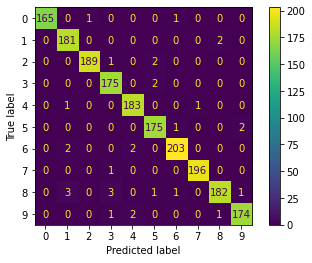

In [8]:
from sklearn.neural_network import MLPClassifier

# Instancia del modelo
model = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000).fit(X_train_std, y_train)

# Preprocesamiento de Test
# Normalizado de los datos mediante RobustScaler
data_std=stdScaler.transform(X_test)
X_test=DataFrame(data=data_std, columns=stdScaler.get_feature_names_out())

# Prediccion
y_pred = model.predict(X_test)

# Resultados del modelo
bacc = balanced_accuracy_score(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)

print(f'''Precisión: {acc:.5f}.\nPrecisión balanceada: {bacc:.5f}''')

plot_confusion_matrix(model, X_test, y_test) 
plt.show()

En base a los resultados obtenidos, se obtiene un modelo con una precisión cerca del 100%, es decir, un modelo altamente precisio.<br>
También, con ayuda de la matriz de confusión, podemos apreciar como los valores mal predichos, son escasos. Siendo mayor la confusión entre el 3 y 5; 8 y 4.

<div style="font-size:14px; text-align:justify"><b>3: </b>Trata de buscar la mejor combinación para los distintos parámetros del modelo.</div>

Partiendo del modelo previo, se va a anlizar el error obtenido y tratar de parametrizar mejor el modelo.

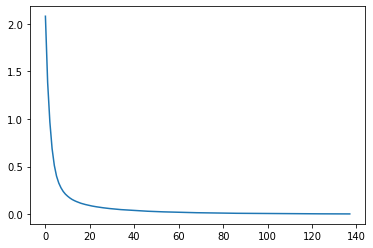

In [9]:
plt.plot(model.loss_curve_)
plt.show()

Se observa que antes de la iteración 1000, el modelo apenas tiene cambio. Se opta por cambiar dicho parametro a 100 y adem,as se le añade dos capas de neuronas más y se amplia a 500 neuronas la primera capa.

Precisión: 0.97951.
Precisión balanceada: 0.97939


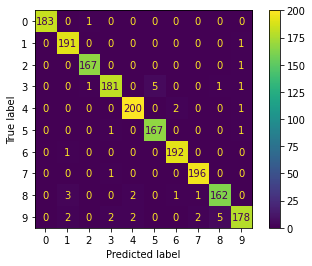

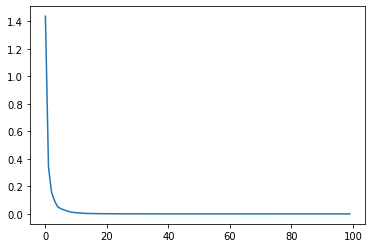

In [10]:
# 1 - Separacion train y test
seed = random.randint(0,42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# 2 - Normalizado de los datos mediante RobustScaler
stdScaler = RobustScaler().fit(X_train)
data_std=stdScaler.transform(X_train)

X_train_std=DataFrame(data=data_std, columns=stdScaler.get_feature_names_out())

# 3 - Instancia del modelo
model = MLPClassifier(hidden_layer_sizes=(500, 100, 500,),max_iter=100
                      , n_iter_no_change=100).fit(X_train_std, y_train)

# 4 - Preprocesamiento de Test
# Normalizado de los datos mediante RobustScaler
data_std=stdScaler.transform(X_test)
X_test=DataFrame(data=data_std, columns=stdScaler.get_feature_names_out())

# 5 - Prediccion
y_pred = model.predict(X_test)

# 6 - Resultados del modelo
bacc = balanced_accuracy_score(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)

print(f'''Precisión: {acc:.5f}.\nPrecisión balanceada: {bacc:.5f}''')

plot_confusion_matrix(model, X_test, y_test)
plt.show()
plt.plot(model.loss_curve_)
plt.show()

Precisión: 0.98652.
Precisión balanceada: 0.98643


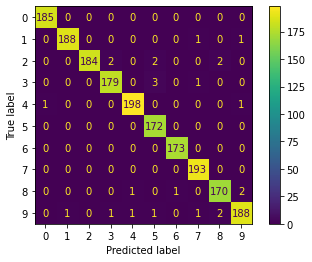

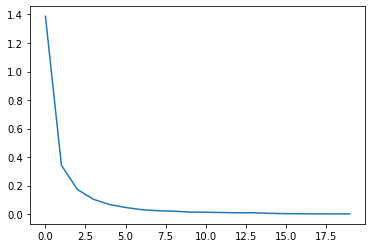

In [11]:
# 1 - Separacion train y test
seed = random.randint(0,42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# 2 - Normalizado de los datos mediante RobustScaler
stdScaler = RobustScaler().fit(X_train)
data_std=stdScaler.transform(X_train)

X_train_std=DataFrame(data=data_std, columns=stdScaler.get_feature_names_out())

# 3 - Instancia del modelo
model = MLPClassifier(hidden_layer_sizes=(500, 100, 500,),max_iter=20
                      , n_iter_no_change=5).fit(X_train_std, y_train)

# 4 - Preprocesamiento de Test
# Normalizado de los datos mediante RobustScaler
data_std=stdScaler.transform(X_test)
X_test=DataFrame(data=data_std, columns=stdScaler.get_feature_names_out())

# 5 - Prediccion
y_pred = model.predict(X_test)

# 6 - Resultados del modelo
bacc = balanced_accuracy_score(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)

print(f'''Precisión: {acc:.5f}.\nPrecisión balanceada: {bacc:.5f}''')

plot_confusion_matrix(model, X_test, y_test)
plt.show()
plt.plot(model.loss_curve_)
plt.show()

Siguiendo bajando el numero máximo de iteraciones, se va aumentando la precisión del modelo. Aunque es pequeño el aumento que se sufre en la precisión, el modelo sigue mejorando con estos austes realizados.